In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from MagicCube import MagicCube

In [2]:
# Parameter
initialTemp = 1000
coolingRate = 0.99
maxIterations = 70000
n = 5

In [3]:
# Fungsi Simulated Annealing
def simulatedAnnealing(mc, initialTemp, coolingRate, maxIterations):

    # Menghasilkan kubus acak sebagai state awal
    currentCube = mc.generateRandomStates()
    mc.cube = currentCube
    currentObjective = mc.objectiveFunction()
    bestCube = currentCube.copy()
    bestObjective = currentObjective

    # List untuk melacak nilai selama iterasi
    temperatures = []
    objectives = []
    deltaEvalues = []

    startTime = time.time()

    for iteration in range(maxIterations):

        # Menghitung suhu untuk iterasi saat ini
        temperature = initialTemp * (coolingRate ** iteration)
        if temperature <= 0:
            break

        # Memilih dua posisi acak dan nge swap menggunakan metode swapElements()
        pos1 = (np.random.randint(0, mc.n), np.random.randint(0, mc.n), np.random.randint(0, mc.n))
        pos2 = (np.random.randint(0, mc.n), np.random.randint(0, mc.n), np.random.randint(0, mc.n))
        mc.swapElements(pos1, pos2)

        # Evaluasi kubus baru
        newObjective = mc.objectiveFunction()
        deltaE = newObjective - currentObjective
        deltaEvalues.append(np.exp(-deltaE / temperature) if temperature > 0 else 0)

        # Kondisi penerimaan solusi
        if deltaE < 0 or np.random.rand() < np.exp(-deltaE / temperature):
            currentCube = mc.cube.copy()
            currentObjective = newObjective

            # Update kubus terbaik jika ditemukan solusi lebih baik
            if currentObjective < bestObjective:
                bestCube = currentCube.copy()
                bestObjective = currentObjective
        else:

            # Jika solusi baru tidak diterima, balikkan swap untuk kembali ke state sebelumnya
            mc.swapElements(pos1, pos2)

        # Menyimpan nilai untuk visualisasi
        temperatures.append(temperature)
        objectives.append(currentObjective)

        # Cek jika sudah magic cube (objective function = 0), keluar dari loop
        if mc.isValid():
            print("Magic Cube ditemukan dengan nilai objective function = 0!")
            break

    endTime = time.time()
    duration = endTime - startTime

    return bestCube, bestObjective, objectives, temperatures, deltaEvalues, duration


In [4]:
# Menjalankan eksperimen
def runExperiment():
    for run in range(3):
        print(f"\n===== Run {run + 1} =====")
        
        # Inisialisasi Magic Cube baru untuk setiap run
        mc = MagicCube(n)
        
        # Menampilkan state awal dari kubus
        print("State Awal Kubus:")
        mc.visualize()
        
        # Run algoritma Simulated Annealing
        bestCube, bestObjective, objectives, temperatures, deltaEvalues, duration = simulatedAnnealing(
            mc, initialTemp, coolingRate, maxIterations
        )
        
        # Menampilkan state akhir dari kubus
        print("State Akhir Kubus:")
        mc.cube = bestCube
        mc.visualize()
        
        # Menampilkan nilai objective function akhir yang dicapai
        print("Nilai Objective Function Akhir:", bestObjective)
        
        # Plot nilai objective function terhadap iterasi
        plt.plot(objectives)
        plt.title(f"Objective Function terhadap Iterasi (Run {run + 1})")
        plt.xlabel("Iterasi")
        plt.ylabel("Objective Function")
        plt.show()
        
        # Menampilkan durasi proses pencarian
        print("Durasi Proses Pencarian:", duration, "detik")
        
        # Plot (e^(delta E / T)) terhadap iterasi
        plt.plot(deltaEvalues)
        plt.title(f"Plot (e^(delta E / T)) terhadap Iterasi (Run {run + 1})")
        plt.xlabel("Iterasi")
        plt.ylabel("(e^(delta E / T))")
        plt.show()
        
        # Menghitung dan menampilkan frekuensi stuck di local optima
        stuckCount = sum(1 for i in range(1, len(objectives)) if objectives[i] == objectives[i - 1])
        print("Frekuensi Stuck di Local Optima:", stuckCount)



===== Run 1 =====
State Awal Kubus:


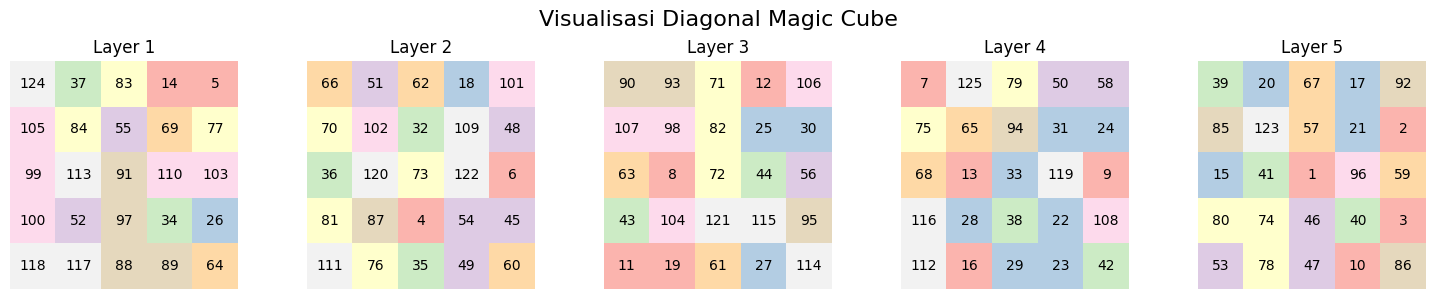

Objective function: 5712
Objective function: 5392
Objective function: 5392
Objective function: 5422
Objective function: 5422
Objective function: 5208
Objective function: 5208
Objective function: 5208
Objective function: 5208
Objective function: 5276
Objective function: 5276
Objective function: 5306
Objective function: 5306
Objective function: 5250
Objective function: 5250
Objective function: 5313
Objective function: 5313
Objective function: 5280
Objective function: 5280
Objective function: 5020
Objective function: 5020
Objective function: 5093
Objective function: 5093
Objective function: 5147
Objective function: 5147
Objective function: 5291
Objective function: 5291
Objective function: 5403
Objective function: 5403
Objective function: 5409
Objective function: 5409
Objective function: 5467
Objective function: 5467
Objective function: 5467
Objective function: 5467
Objective function: 5447
Objective function: 5447
Objective function: 5421
Objective function: 5421
Objective function: 5479


C:\Users\Moh Afnan Fawaz\AppData\Local\Temp\ipykernel_14804\1823519798.py:33: RuntimeWarning: overflow encountered in exp
  deltaEvalues.append(np.exp(-deltaE / temperature) if temperature > 0 else 0)


Objective function: 1181
Objective function: 979
Objective function: 1348
Objective function: 979
Objective function: 989
Objective function: 979
Objective function: 1437
Objective function: 979
Objective function: 1095
Objective function: 979
Objective function: 1313
Objective function: 979
Objective function: 1102
Objective function: 979
Objective function: 1425
Objective function: 979
Objective function: 1511
Objective function: 979
Objective function: 1013
Objective function: 979
Objective function: 1059
Objective function: 979
Objective function: 1000
Objective function: 979
Objective function: 1013
Objective function: 979
Objective function: 1547
Objective function: 979
Objective function: 1502
Objective function: 979
Objective function: 1219
Objective function: 979
Objective function: 1155
Objective function: 979
Objective function: 1273
Objective function: 979
Objective function: 1640
Objective function: 979
Objective function: 1248
Objective function: 979
Objective function: 1

KeyboardInterrupt: 

In [5]:
runExperiment()